<a href="https://colab.research.google.com/github/Ikhwan22/Tugas-Bisnis-Cerdas-Paper/blob/main/stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from collections import Counter 
stopwords = set(STOPWORDS)

from google.colab import files
import io

In [2]:
upload_train = files.upload()

Saving Constraint_Train.xlsx to Constraint_Train.xlsx


In [3]:
# train = pd.read_excel('../english_train.xlsx')
train = pd.read_excel(io.BytesIO(upload_train["Constraint_Train.xlsx"]))
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6420 non-null   int64 
 1   tweet   6420 non-null   object
 2   label   6420 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.6+ KB


In [4]:
upload_val = files.upload()

Saving Constraint_Val.xlsx to Constraint_Val.xlsx


In [5]:
# val = pd.read_excel('../english_val.xlsx')
val   = pd.read_excel(io.BytesIO(upload_val["Constraint_Val.xlsx"]))
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2140 non-null   int64 
 1   tweet   2140 non-null   object
 2   label   2140 non-null   object
dtypes: int64(1), object(2)
memory usage: 50.3+ KB


In [6]:
upload_test = files.upload()

Saving english_test_with_labels.xlsx to english_test_with_labels.xlsx


In [7]:
# test = pd.read_excel('../english_test.xlsx')
test   = pd.read_excel(io.BytesIO(upload_test["english_test_with_labels.xlsx"]))
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2140 non-null   int64 
 1   tweet   2140 non-null   object
 2   label   2140 non-null   object
dtypes: int64(1), object(2)
memory usage: 50.3+ KB


In [8]:
entire = pd.concat([train, val, test])
entire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10700 entries, 0 to 2139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10700 non-null  int64 
 1   tweet   10700 non-null  object
 2   label   10700 non-null  object
dtypes: int64(1), object(2)
memory usage: 334.4+ KB


In [9]:
print(train['label'].value_counts())
print(val['label'].value_counts())
print(test['label'].value_counts())
print(entire['label'].value_counts())

real    3360
fake    3060
Name: label, dtype: int64
real    1120
fake    1020
Name: label, dtype: int64
real    1120
fake    1020
Name: label, dtype: int64
real    5600
fake    5100
Name: label, dtype: int64


In [10]:
combined = entire['tweet']
fake = entire[entire['label']=='fake']['tweet']
real = entire[entire['label']=='real']['tweet']

In [11]:
print(sum(len(x) for x in combined) / len(combined))
print(sum(len(x) for x in fake) / len(fake))
print(sum(len(x) for x in real) / len(real))

182.15803738317757
143.36254901960785
217.48964285714285


In [12]:
print(sum(len(x.split()) for x in combined) / len(combined))
print(sum(len(x.split()) for x in fake) / len(fake))
print(sum(len(x.split()) for x in real) / len(real))

27.05177570093458
21.652941176470588
31.96857142857143


In [13]:
def concat_all_sentences(sents):
    all_tokens = ''
    for text in sents:
        tx = str(text).lower().strip()
        tx = tx.replace('\n',' ')
        tx = tx.replace('&amp',' ')
        tx = tx.replace('#','')
        tx = tx.replace('-','')
        tx = tx.replace(';','')
        tx = " ".join(tx.split())
        all_tokens += tx + " "
    return all_tokens

In [14]:
all_tokens = concat_all_sentences(combined)
fake_tokens = concat_all_sentences(fake)   
real_tokens = concat_all_sentences(real)

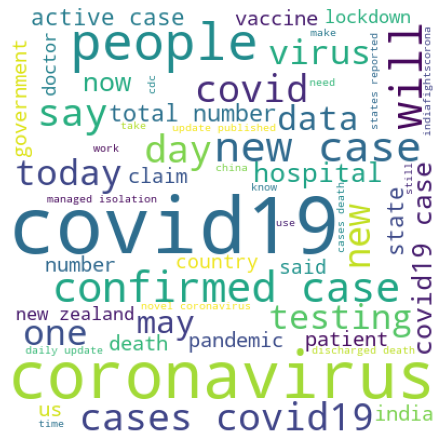

In [15]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = stopwords.union({'https','co'}), 
            min_font_size = 10).generate(all_tokens) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

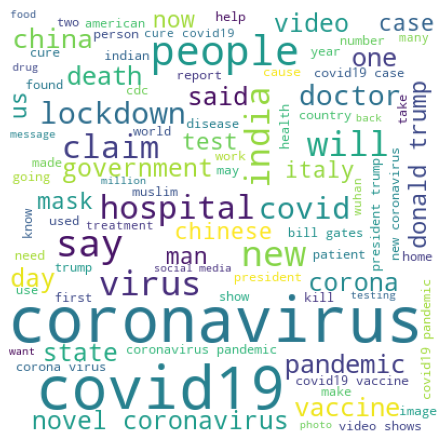

In [16]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = stopwords.union({'https','co'}), 
            min_font_size = 10).generate(fake_tokens) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

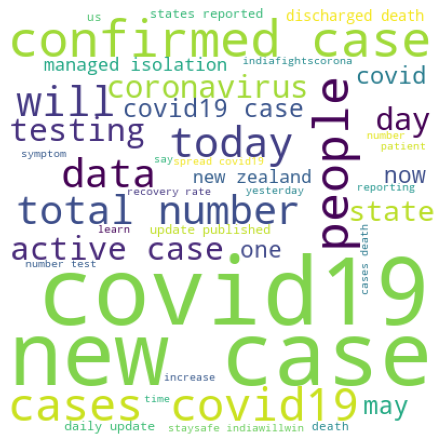

In [17]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = stopwords.union({'https','co'}), 
            min_font_size = 10).generate(real_tokens) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [18]:
print(len(set(all_tokens.split())))
print(len(set(fake_tokens.split())))
print(len(set(real_tokens.split())))
print(len(set(fake_tokens.split()).intersection(set(real_tokens.split()))))

37734
19810
23083
5159


In [19]:
all_tokens_words = [w for w in all_tokens.split() if w not in stopwords]
fake_tokens_words = [w for w in fake_tokens.split() if w not in stopwords]
real_tokens_words = [w for w in real_tokens.split() if w not in stopwords]

In [20]:
Counter(all_tokens_words).most_common(20)

[('covid19', 4236),
 ('cases', 2471),
 ('coronavirus', 2101),
 ('new', 1785),
 ('people', 1182),
 ('tests', 1025),
 ('number', 858),
 ('will', 813),
 ('deaths', 804),
 ('total', 802),
 ('confirmed', 782),
 ('reported', 774),
 ('states', 753),
 ('testing', 701),
 ('covid19.', 661),
 ('health', 631),
 ('covid', 623),
 ('now', 593),
 ('india', 537),
 ('one', 535)]

In [21]:
Counter(fake_tokens_words).most_common(20)

[('coronavirus', 1672),
 ('covid19', 1513),
 ('people', 455),
 ('will', 394),
 ('new', 343),
 ('coronavirus.', 335),
 ('trump', 333),
 ('says', 320),
 ('video', 307),
 ('covid19.', 300),
 ('vaccine', 286),
 ('virus', 270),
 ('president', 243),
 ('covid', 233),
 ('cases', 219),
 ('shows', 219),
 ('pandemic', 217),
 ('hospital', 217),
 ('india', 211),
 ('claims', 197)]

In [22]:
Counter(real_tokens_words).most_common(20)

[('covid19', 2723),
 ('cases', 2252),
 ('new', 1442),
 ('tests', 941),
 ('number', 789),
 ('total', 775),
 ('people', 727),
 ('reported', 719),
 ('confirmed', 712),
 ('states', 668),
 ('deaths', 668),
 ('testing', 613),
 ('now', 485),
 ('health', 447),
 ('rt', 437),
 ('coronavirus', 429),
 ('will', 419),
 ('report', 415),
 ('state', 395),
 ('covid', 390)]